<a href="https://colab.research.google.com/github/siddharth-kale/Twitter-Analysis/blob/main/Keyword_Influencers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sea
!pip install snscrape
import snscrape.modules.twitter as sntwitter
import re
!pip install networkx
import networkx as nx

In [ ]:
pd.options.display.max_rows=1000

In [ ]:
keyword = 'B.1.640.2'
startdate = "2021-11-01"
enddate = "2022-01-05"

In [ ]:
maxtweets = 5000000
tweetlist=[]
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('{} since:{} until:{}'.format(keyword,startdate,enddate)).get_items()):
   if i>maxtweets:
         break
   tweetlist.append(tweet)

tweets_df = pd.DataFrame(tweetlist)

In [ ]:
tweets_df

,url,date,content,id,username,outlinks,outlinksss,tcooutlinks,tcooutlinksss
0,https://twitter.com/Dont_Lie2_Me/status/147851...,2022-01-04 23:59:27+00:00,"@CharlesMBlow ""The new variant — B.1.640.2 — w...",1478516456124035074,Dont_Lie2_Me,[],,[],
1,https://twitter.com/47NE/status/14785164459276...,2022-01-04 23:59:24+00:00,Ahhh enfin ! On commençait à se faire chier av...,1478516445927645188,47NE,"[http://ladepeche.fr, https://www.ladepeche.fr...",http://ladepeche.fr https://www.ladepeche.fr/2...,"[https://t.co/udaJrMMM9P, https://t.co/c4wL42J...",https://t.co/udaJrMMM9P https://t.co/c4wL42JbfO
2,https://twitter.com/chiakishogi/status/1478515...,2022-01-04 23:57:17+00:00,@kuramochijin @YouTube フランスでオミクロンの変異b.1.640.2が...,1478515912513044480,chiakishogi,[],,[],
3,https://twitter.com/Connecticut3Bs/status/1478...,2022-01-04 23:55:44+00:00,@chicagotribune 'IHU' COVID Variant being watc...,1478515521188413445,Connecticut3Bs,[https://www.newsweek.com/ihu-covid-variant-b-...,https://www.newsweek.com/ihu-covid-variant-b-1...,[https://t.co/kk3xEGjyo7],https://t.co/kk3xEGjyo7
4,https://twitter.com/BizzleScott2/status/147851...,2022-01-04 23:55:42+00:00,I am only going to say this once. B.1.640.2 is...,1478515512963444737,BizzleScott2,[],,[],
...,...,...,...,...,...,...,...,...,...
2934,https://twitter.com/touna14/status/14689057015...,2021-12-09 11:29:44+00:00,Les deux sous-lignées B.1.640.1 et B.1.640.2 o...,1468905701506433027,touna14,[https://twitter.com/touna14/status/1468301045...,https://twitter.com/touna14/status/14683010452...,"[https://t.co/tz9JXM8fRI, https://t.co/BwtIXjp...",https://t.co/tz9JXM8fRI https://t.co/BwtIXjpOpt
2935,https://twitter.com/BidoucheLou/status/1468889...,2021-12-09 10:25:09+00:00,@Cecilou54 Un variant issu de malades de forca...,1468889445348921345,BidoucheLou,[],,[],
2936,https://twitter.com/IHU_Marseille/status/14688...,2021-12-09 10:21:46+00:00,Un nouveau variant COVID-19 à été détecté à l'...,1468888596103024641,IHU_Marseille,[],,[],
2937,https://twitter.com/bicidiario/status/14686221...,2021-12-08 16:43:03+00:00,Variants seekers go on monitoring what is happ...,1468622160943992833,bicidiario,[],,[],


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
tweets_df.to_csv('/content/gdrive/MyDrive/Projects/Twitter Network Analysis/Data/{}Influencer.csv'.format(keyword))

In [ ]:
tweets_df = pd.read_csv('/content/gdrive/MyDrive/Projects/Twitter Network Analysis/Data/{}Influencer.csv'.format(keyword))

In [ ]:
tweets_df = tweets_df.drop(columns=['Unnamed: 0'])
tweets_df = tweets_df.drop_duplicates(subset='id')
tweets_df

,url,date,content,id,username,outlinks,outlinksss,tcooutlinks,tcooutlinksss
0,https://twitter.com/Dont_Lie2_Me/status/147851...,2022-01-04 23:59:27+00:00,"@CharlesMBlow ""The new variant — B.1.640.2 — w...",1478516456124035074,Dont_Lie2_Me,[],NaN,[],NaN
1,https://twitter.com/47NE/status/14785164459276...,2022-01-04 23:59:24+00:00,Ahhh enfin ! On commençait à se faire chier av...,1478516445927645188,47NE,"['http://ladepeche.fr', 'https://www.ladepeche...",http://ladepeche.fr https://www.ladepeche.fr/2...,"['https://t.co/udaJrMMM9P', 'https://t.co/c4wL...",https://t.co/udaJrMMM9P https://t.co/c4wL42JbfO
2,https://twitter.com/chiakishogi/status/1478515...,2022-01-04 23:57:17+00:00,@kuramochijin @YouTube フランスでオミクロンの変異b.1.640.2が...,1478515912513044480,chiakishogi,[],NaN,[],NaN
3,https://twitter.com/Connecticut3Bs/status/1478...,2022-01-04 23:55:44+00:00,@chicagotribune 'IHU' COVID Variant being watc...,1478515521188413445,Connecticut3Bs,['https://www.newsweek.com/ihu-covid-variant-b...,https://www.newsweek.com/ihu-covid-variant-b-1...,['https://t.co/kk3xEGjyo7'],https://t.co/kk3xEGjyo7
4,https://twitter.com/BizzleScott2/status/147851...,2022-01-04 23:55:42+00:00,I am only going to say this once. B.1.640.2 is...,1478515512963444737,BizzleScott2,[],NaN,[],NaN
...,...,...,...,...,...,...,...,...,...
2934,https://twitter.com/touna14/status/14689057015...,2021-12-09 11:29:44+00:00,Les deux sous-lignées B.1.640.1 et B.1.640.2 o...,1468905701506433027,touna14,['https://twitter.com/touna14/status/146830104...,https://twitter.com/touna14/status/14683010452...,"['https://t.co/tz9JXM8fRI', 'https://t.co/BwtI...",https://t.co/tz9JXM8fRI https://t.co/BwtIXjpOpt
2935,https://twitter.com/BidoucheLou/status/1468889...,2021-12-09 10:25:09+00:00,@Cecilou54 Un variant issu de malades de forca...,1468889445348921345,BidoucheLou,[],NaN,[],NaN
2936,https://twitter.com/IHU_Marseille/status/14688...,2021-12-09 10:21:46+00:00,Un nouveau variant COVID-19 à été détecté à l'...,1468888596103024641,IHU_Marseille,[],NaN,[],NaN
2937,https://twitter.com/bicidiario/status/14686221...,2021-12-08 16:43:03+00:00,Variants seekers go on monitoring what is happ...,1468622160943992833,bicidiario,[],NaN,[],NaN


In [ ]:
interaction_df = pd.DataFrame(columns=['source','target'])
ind=0
for i in range(0,len(tweets_df)):
  templist=[]
  templist=re.findall('@\w+',str(tweets_df.iloc[i,2]))
  
  if len(templist)==0:
    interaction_df.loc[ind,'source'] = tweets_df.iloc[i,4]
    interaction_df.loc[ind,'target'] = ''
    ind = ind+1

  else:
    for j in range(0,len(templist)): 
      interaction_df.loc[ind,'source'] = tweets_df.iloc[i,4]
      interaction_df.loc[ind,'target'] = templist[j][1:]
      ind = ind+1

interaction_df.head(999)



,source,target
0,Dont_Lie2_Me,CharlesMBlow
1,47NE,
2,chiakishogi,kuramochijin
3,chiakishogi,YouTube
4,Connecticut3Bs,chicagotribune
5,BizzleScott2,
6,Newsweek,
7,sqlguru1960,PlzCallMeT
8,AdrianChacon31,
9,twellness,


In [ ]:
interaction_df = interaction_df[interaction_df['target'].isin(interaction_df['source'])]
interaction_df

,source,target
11,Knight19730219,aktuelle_stunde
18,Bobby_Don_Welch,IHU_Marseille
34,MiKuehm,ZDFheute
58,KoyamaMichi,Susie123110
67,MiKuehm,RND_de
84,MiKuehm,ZDFheute
102,realZenelan,hjelle_brian
105,PoderyCritica,PoderyCritica
151,DaveySports98,sailorrooscout
223,TGer66,EckerleIsabella


In [ ]:
nodes_df = pd.DataFrame(interaction_df.stack()).reset_index().drop(columns=['level_0','level_1'])
nodes_df.columns=['username']
complete_nodes=list(set(nodes_df[nodes_df['username']!='']['username'].to_list()))

In [ ]:
G = nx.DiGraph()

In [ ]:
for i in range(0,len(complete_nodes)):
  G.add_node(complete_nodes[i])

print(G.number_of_nodes())

219


In [ ]:
full_interaction_df = interaction_df[interaction_df['target']!='']
for i in range(0,len(full_interaction_df)):
  G.add_edge(full_interaction_df.iloc[i,0],full_interaction_df.iloc[i,1])

In [ ]:
nodedegree=pd.DataFrame.from_dict(dict(G.in_degree),orient='index')
nodedegree = nodedegree.reset_index()
nodedegree.columns=['Name','Influence']
nodedegree = nodedegree.sort_values(by='Influence',ascending=False)
nodedegree.head(999)

,Name,Influence
185,hjelle_brian,18
191,PeacockFlu,17
29,realB11529,14
170,sailorrooscout,13
22,Gab_H_R,8
85,derspiegel,8
213,IHU_Marseille,6
41,_almond_tree,5
129,jouwatch,5
173,ZDFheute,5


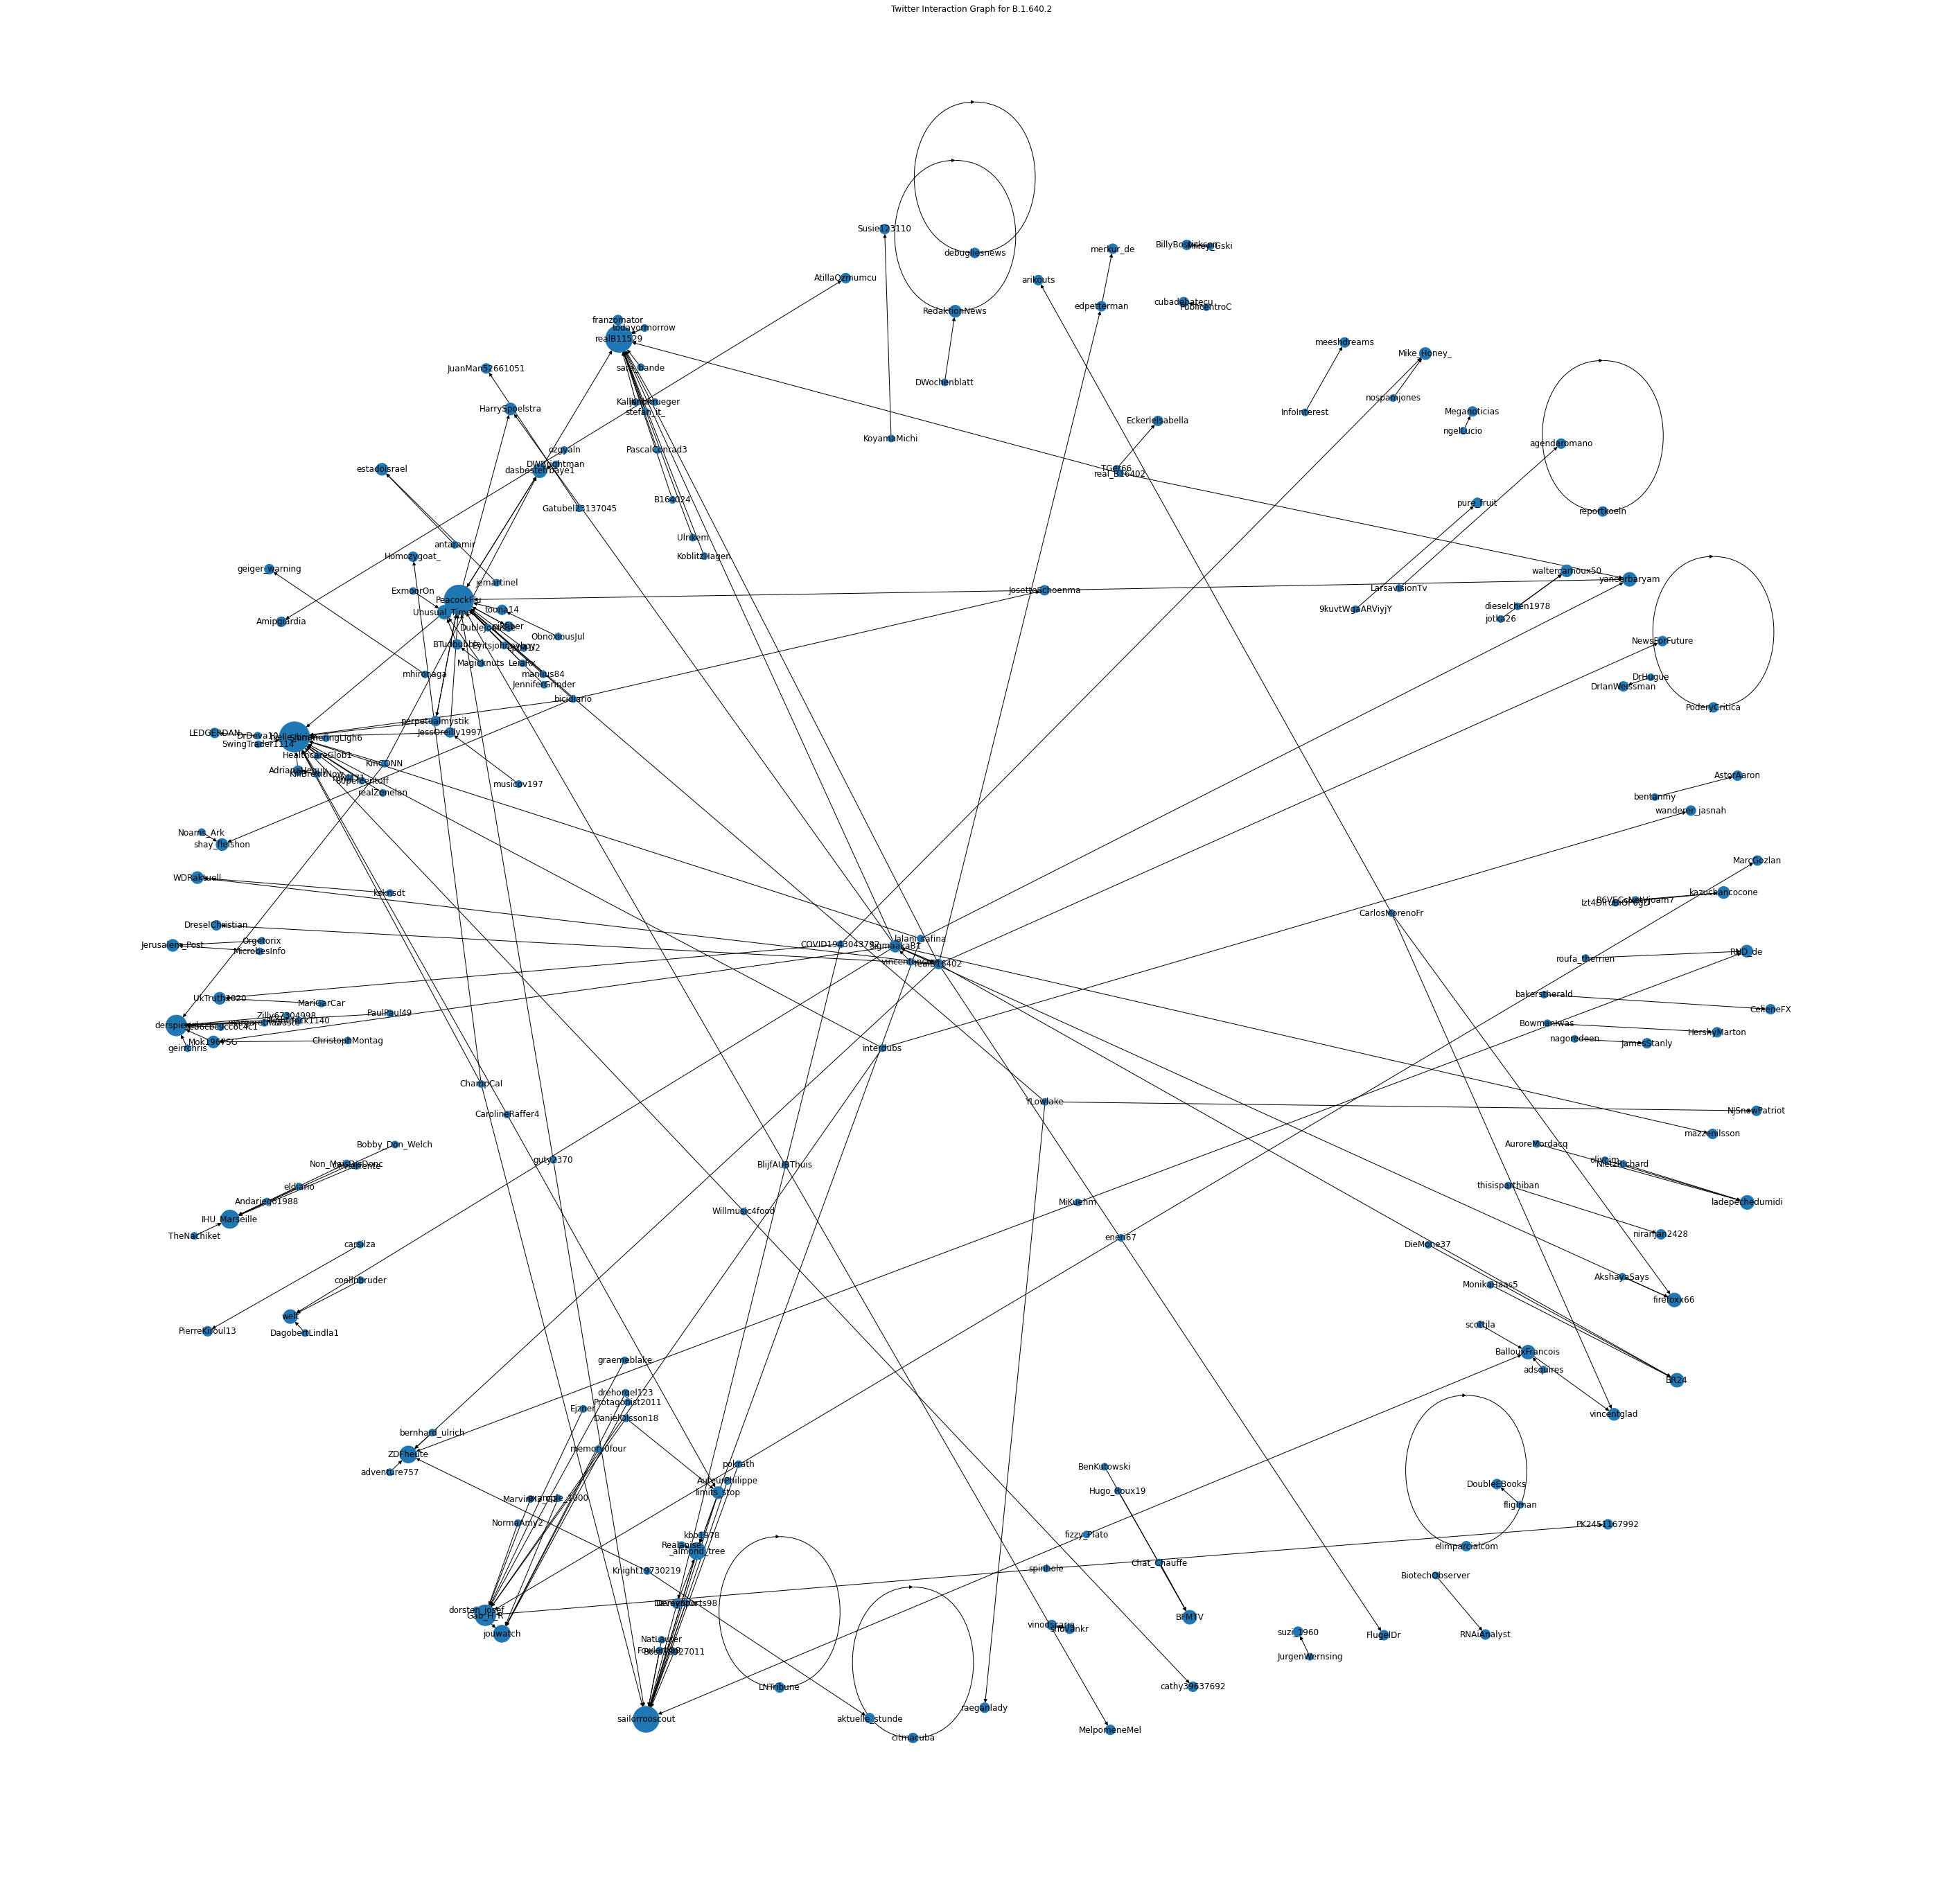

In [20]:
d =dict(G.in_degree)
plt.figure(figsize=(50,50))
plt.title('Twitter Interaction Graph for {}'.format(keyword))
nx.draw(G,node_size=[(x+1) * 100 for x in list(d.values())],with_labels=True)
plt.show()